In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
import sys
import metpy
import matplotlib
import matplotlib.gridspec as gridspec
import geopandas
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from netCDF4 import Dataset
import os
import glob
import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

# av temp

In [3]:
files_av_temp_scrn = [
    "/g/data/v46/yvh565/barra2/yhuang/20220208T0000Z/av_temp_scrn-barra_r2-hres-202202080300-202202080900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220208T0600Z/av_temp_scrn-barra_r2-hres-202202080900-202202081500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220208T1200Z/av_temp_scrn-barra_r2-hres-202202081500-202202082100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220208T1800Z/av_temp_scrn-barra_r2-hres-202202082100-202202090300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T0000Z/av_temp_scrn-barra_r2-hres-202202090300-202202090900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T0600Z/av_temp_scrn-barra_r2-hres-202202090900-202202091500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T1200Z/av_temp_scrn-barra_r2-hres-202202091500-202202092100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T1800Z/av_temp_scrn-barra_r2-hres-202202092100-202202100300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T0000Z/av_temp_scrn-barra_r2-hres-202202100300-202202100900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T0600Z/av_temp_scrn-barra_r2-hres-202202100900-202202101500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T1200Z/av_temp_scrn-barra_r2-hres-202202101500-202202102100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T1800Z/av_temp_scrn-barra_r2-hres-202202102100-202202110300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T0000Z/av_temp_scrn-barra_r2-hres-202202110300-202202110900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T0600Z/av_temp_scrn-barra_r2-hres-202202110900-202202111500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T1200Z/av_temp_scrn-barra_r2-hres-202202111500-202202112100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T1800Z/av_temp_scrn-barra_r2-hres-202202112100-202202120300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T0000Z/av_temp_scrn-barra_r2-hres-202202120300-202202120900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T0600Z/av_temp_scrn-barra_r2-hres-202202120900-202202121500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T1200Z/av_temp_scrn-barra_r2-hres-202202121500-202202122100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T1800Z/av_temp_scrn-barra_r2-hres-202202122100-202202130300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T0000Z/av_temp_scrn-barra_r2-hres-202202130300-202202130900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T0600Z/av_temp_scrn-barra_r2-hres-202202130900-202202131500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T1200Z/av_temp_scrn-barra_r2-hres-202202131500-202202132100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T1800Z/av_temp_scrn-barra_r2-hres-202202132100-202202140300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T0000Z/av_temp_scrn-barra_r2-hres-202202140300-202202140900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T0600Z/av_temp_scrn-barra_r2-hres-202202140900-202202141500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T1200Z/av_temp_scrn-barra_r2-hres-202202141500-202202142100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T1800Z/av_temp_scrn-barra_r2-hres-202202142100-202202150300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T0000Z/av_temp_scrn-barra_r2-hres-202202150300-202202150900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T0600Z/av_temp_scrn-barra_r2-hres-202202150900-202202151500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T1200Z/av_temp_scrn-barra_r2-hres-202202151500-202202152100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T1800Z/av_temp_scrn-barra_r2-hres-202202152100-202202160300.nc",
]

In [4]:
barra2_ds = xr.open_mfdataset(files_av_temp_scrn, engine="netcdf4")

In [44]:
lat_slice = slice(-21,-15)                              #-16 degrees is cairns latitude, -19 degrees is Townsville
lon_slice = slice(142, 154)

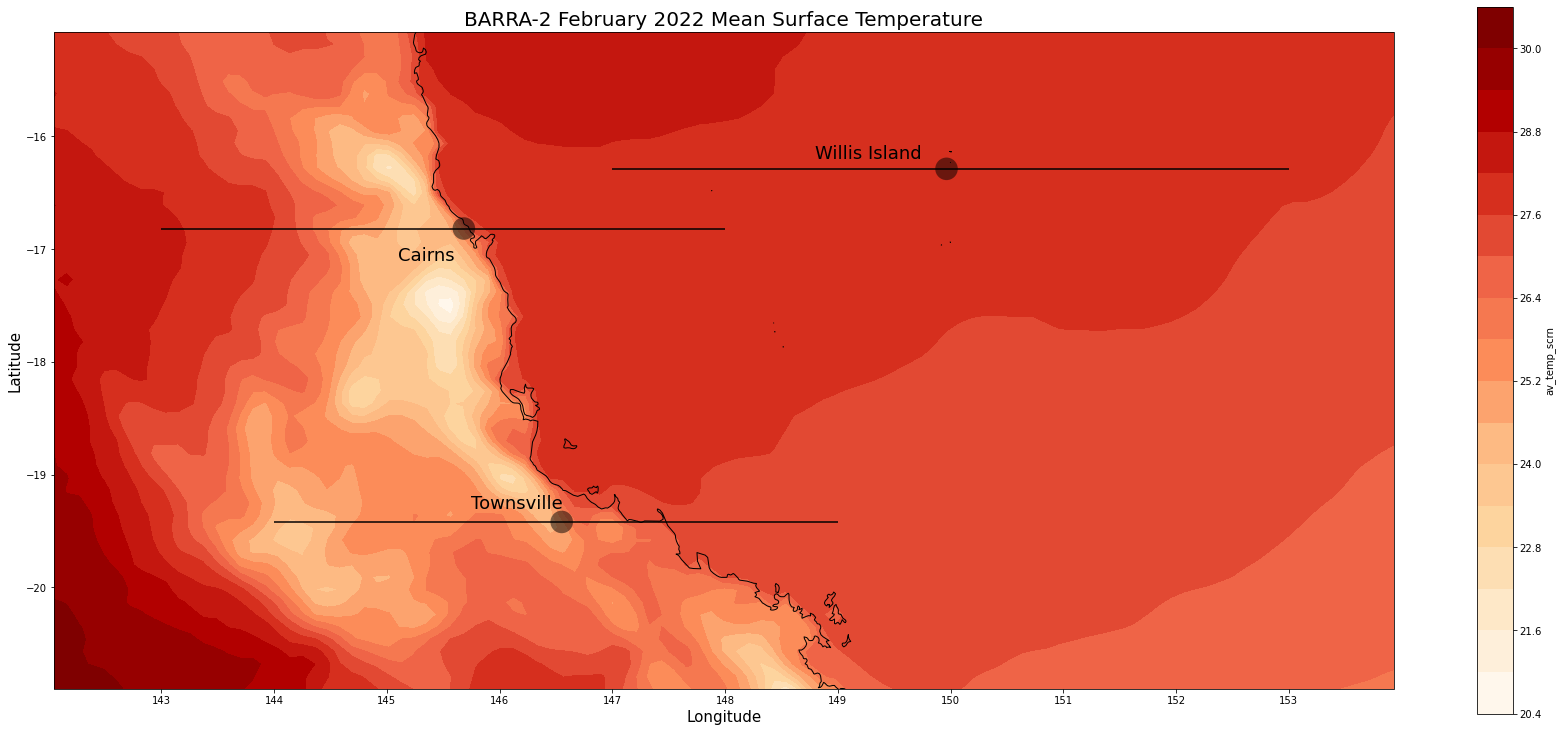

In [46]:
# Setup to plot
fig = plt.figure(1, figsize=[30,13])
fig.patch.set_facecolor('white')

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# plot mean
df = barra2_ds["av_temp_scrn"].sel(latitude=lat_slice,longitude=lon_slice).mean("time") - 273.15
df.plot.contourf(levels=20,ax=ax, cmap='OrRd')

# Add axes labels
ax.set_xticks([142,143,144,145,146,147,148,149,150,151,152,153])
ax.set_yticks([-15,-16,-17,-18,-19,-20,-21])
ax.set_title("BARRA-2 February 2022 Mean Surface Temperature",fontsize=20)
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15)
# Add annotations to plot
circle_T = mpatches.Circle((146.5509,-19.4198),0.1,alpha=0.5,fc="black") # Townsville
circle_C = mpatches.Circle((145.683,-16.817),0.1,alpha=0.5,fc="black") # Cairns
circle_W = mpatches.Circle((149.9646,-16.2874),0.1,alpha=0.5,fc="black") # Willis Island
ax.add_patch(circle_T)
ax.add_patch(circle_C)
ax.add_patch(circle_W)
ax.annotate("Townsville",(145.75,-19.3),fontsize=18)
ax.annotate("Cairns",(145.1,-17.1),fontsize=18)
ax.annotate("Willis Island",(148.8,-16.2),fontsize=18)

# plot horizontal lines - cross-sections
plt.hlines(-19.4198,144,149,colors='k',linestyles="solid")
plt.hlines(-16.817,143,148,colors='k',linestyles="solid")
plt.hlines(-16.2874,147,153,colors='k',linestyles="solid");

# Wind

In [47]:
files_av_uwnd10m_b = [
    "/g/data/v46/yvh565/barra2/yhuang/20220208T0000Z/av_uwnd10m_b-barra_r2-hres-202202080300-202202080900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220208T0600Z/av_uwnd10m_b-barra_r2-hres-202202080900-202202081500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220208T1200Z/av_uwnd10m_b-barra_r2-hres-202202081500-202202082100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220208T1800Z/av_uwnd10m_b-barra_r2-hres-202202082100-202202090300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T0000Z/av_uwnd10m_b-barra_r2-hres-202202090300-202202090900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T0600Z/av_uwnd10m_b-barra_r2-hres-202202090900-202202091500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T1200Z/av_uwnd10m_b-barra_r2-hres-202202091500-202202092100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220209T1800Z/av_uwnd10m_b-barra_r2-hres-202202092100-202202100300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T0000Z/av_uwnd10m_b-barra_r2-hres-202202100300-202202100900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T0600Z/av_uwnd10m_b-barra_r2-hres-202202100900-202202101500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T1200Z/av_uwnd10m_b-barra_r2-hres-202202101500-202202102100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220210T1800Z/av_uwnd10m_b-barra_r2-hres-202202102100-202202110300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T0000Z/av_uwnd10m_b-barra_r2-hres-202202110300-202202110900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T0600Z/av_uwnd10m_b-barra_r2-hres-202202110900-202202111500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T1200Z/av_uwnd10m_b-barra_r2-hres-202202111500-202202112100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220211T1800Z/av_uwnd10m_b-barra_r2-hres-202202112100-202202120300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T0000Z/av_uwnd10m_b-barra_r2-hres-202202120300-202202120900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T0600Z/av_uwnd10m_b-barra_r2-hres-202202120900-202202121500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T1200Z/av_uwnd10m_b-barra_r2-hres-202202121500-202202122100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220212T1800Z/av_uwnd10m_b-barra_r2-hres-202202122100-202202130300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T0000Z/av_uwnd10m_b-barra_r2-hres-202202130300-202202130900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T0600Z/av_uwnd10m_b-barra_r2-hres-202202130900-202202131500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T1200Z/av_uwnd10m_b-barra_r2-hres-202202131500-202202132100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220213T1800Z/av_uwnd10m_b-barra_r2-hres-202202132100-202202140300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T0000Z/av_uwnd10m_b-barra_r2-hres-202202140300-202202140900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T0600Z/av_uwnd10m_b-barra_r2-hres-202202140900-202202141500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T1200Z/av_uwnd10m_b-barra_r2-hres-202202141500-202202142100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220214T1800Z/av_uwnd10m_b-barra_r2-hres-202202142100-202202150300.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T0000Z/av_uwnd10m_b-barra_r2-hres-202202150300-202202150900.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T0600Z/av_uwnd10m_b-barra_r2-hres-202202150900-202202151500.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T1200Z/av_uwnd10m_b-barra_r2-hres-202202151500-202202152100.nc",
    "/g/data/v46/yvh565/barra2/yhuang/20220215T1800Z/av_uwnd10m_b-barra_r2-hres-202202152100-202202160300.nc",
]

In [48]:
barra2_ds = xr.open_mfdataset(files_av_uwnd10m_b, engine="netcdf4")

In [49]:
lat_slice = slice(-21,-15)                              #-16 degrees is cairns latitude, -19 degrees is Townsville
lon_slice = slice(142, 154)

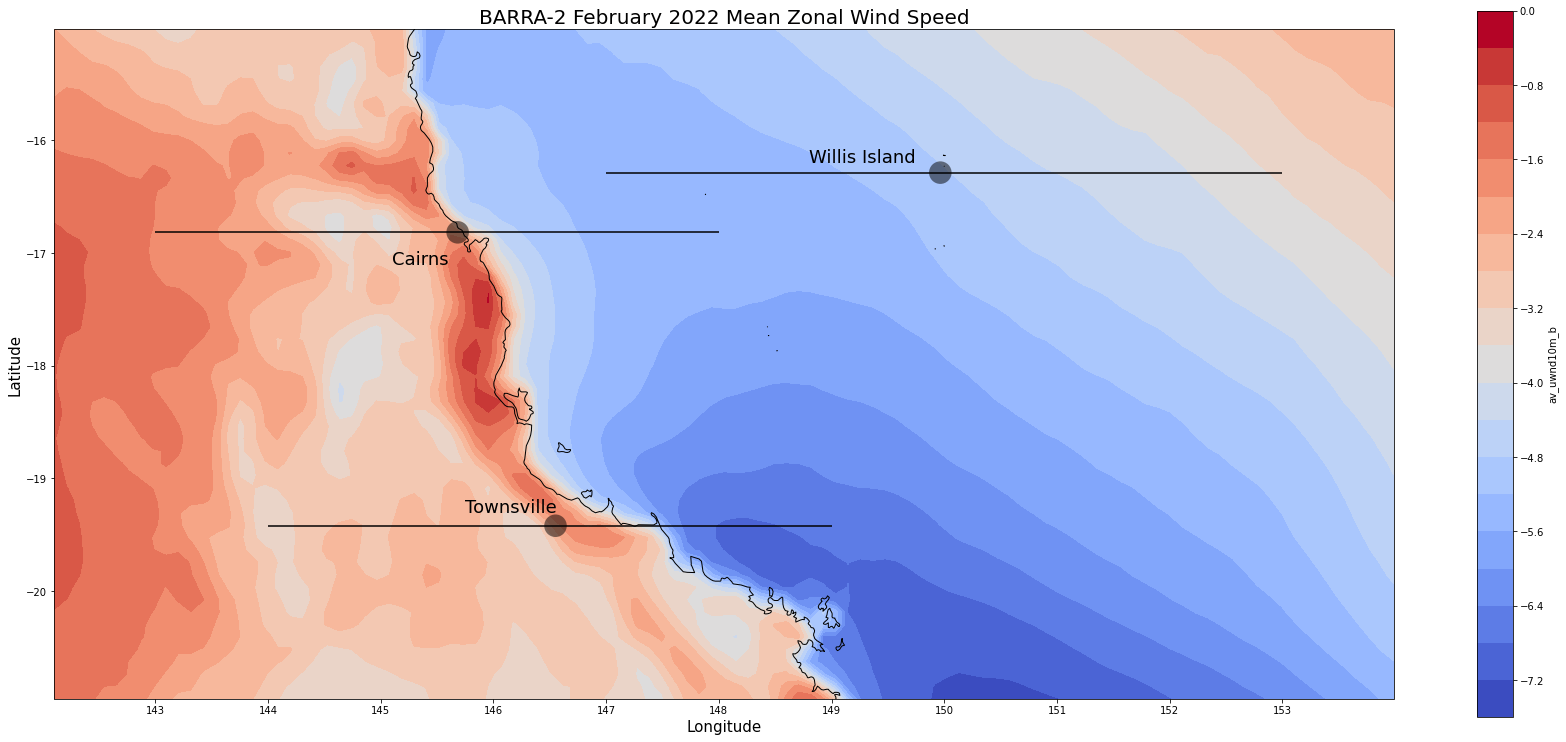

In [51]:
# Setup to plot
fig = plt.figure(1, figsize=[30,13])
fig.patch.set_facecolor('white')

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# plot mean
df = barra2_ds["av_uwnd10m_b"].sel(latitude=lat_slice,longitude=lon_slice).mean("time")
df.plot.contourf(levels=20,ax=ax, cmap='coolwarm')

# Add axes labels
ax.set_xticks([142,143,144,145,146,147,148,149,150,151,152,153])
ax.set_yticks([-15,-16,-17,-18,-19,-20,-21])
ax.set_title("BARRA-2 February 2022 Mean Zonal Wind Speed",fontsize=20)
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15)
# Add annotations to plot
circle_T = mpatches.Circle((146.5509,-19.4198),0.1,alpha=0.5,fc="black") # Townsville
circle_C = mpatches.Circle((145.683,-16.817),0.1,alpha=0.5,fc="black") # Cairns
circle_W = mpatches.Circle((149.9646,-16.2874),0.1,alpha=0.5,fc="black") # Willis Island
ax.add_patch(circle_T)
ax.add_patch(circle_C)
ax.add_patch(circle_W)
ax.annotate("Townsville",(145.75,-19.3),fontsize=18)
ax.annotate("Cairns",(145.1,-17.1),fontsize=18)
ax.annotate("Willis Island",(148.8,-16.2),fontsize=18)

# plot horizontal lines - cross-sections
plt.hlines(-19.4198,144,149,colors='k',linestyles="solid")
plt.hlines(-16.817,143,148,colors='k',linestyles="solid")
plt.hlines(-16.2874,147,153,colors='k',linestyles="solid");